In [1]:
from datetime import timedelta
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('../definitions')
import definitions_plotting as defplot
from datetime import datetime

Define Date Range

In [2]:
start_date = '2024-03-21'
end_date = '2024-07-10'

start_date_obj = datetime.strptime(start_date, '%Y-%m-%d')
end_date_obj = datetime.strptime(end_date, '%Y-%m-%d')
num_days = (end_date_obj - start_date_obj).days

Call functions in definitions folder

In [3]:
data_mag = defplot.get_data('ctumag', defplot.read_txt_file, start_date, end_date)
data_squid = defplot.get_data('squid', defplot.read_txt_file, start_date, end_date)

data_array_mag = defplot.process_data(data_mag)
data_array_sq = defplot.process_data(data_squid)

time, NSsq, Zsq = defplot.parse_squid_data(data_array_sq)
timemag, NSmag, EWmag, Zmag = defplot.parse_magnetic_data(data_array_mag)
# print first 5 values of time, NSsq, Zsq
# print(f"First 5 values of array time: {timemag.head()}")
# print(f"First 5 values of array NSmag: {NSmag.head()}")
# print(f"First 5 values of array EWmag: {EWmag.head()}")
# print(f"First 5 values of array Zmag: {Zmag.head()}")


Data frame head: 
       0           1        2           3
0  0.20  10963.7487 -75.1369 -22673.3896
1  0.40  10963.7480 -75.0673 -22673.5228
2  0.59  10963.7480 -75.0673 -22673.5228
3  0.79  10963.7493 -75.0661 -22673.5074
4  0.99  10963.7537 -75.0418 -22673.5760
Data frame shape: (47939431, 4)
Data frame head: 
       0        1        2
0  0.20  26.8975 -21.3825
1  0.40  26.8976 -21.3850
2  0.59  26.8986 -21.3782
3  0.79  26.8990 -21.3849
4  0.99  26.9028 -21.3667
Data frame shape: (47939430, 3)


Calculate the day index for each sample

Number of days between 2024-03-21 and 2024-07-10: 111
Number of samples in 111 days is : 47939430
Therefore number of samples per day: 431886


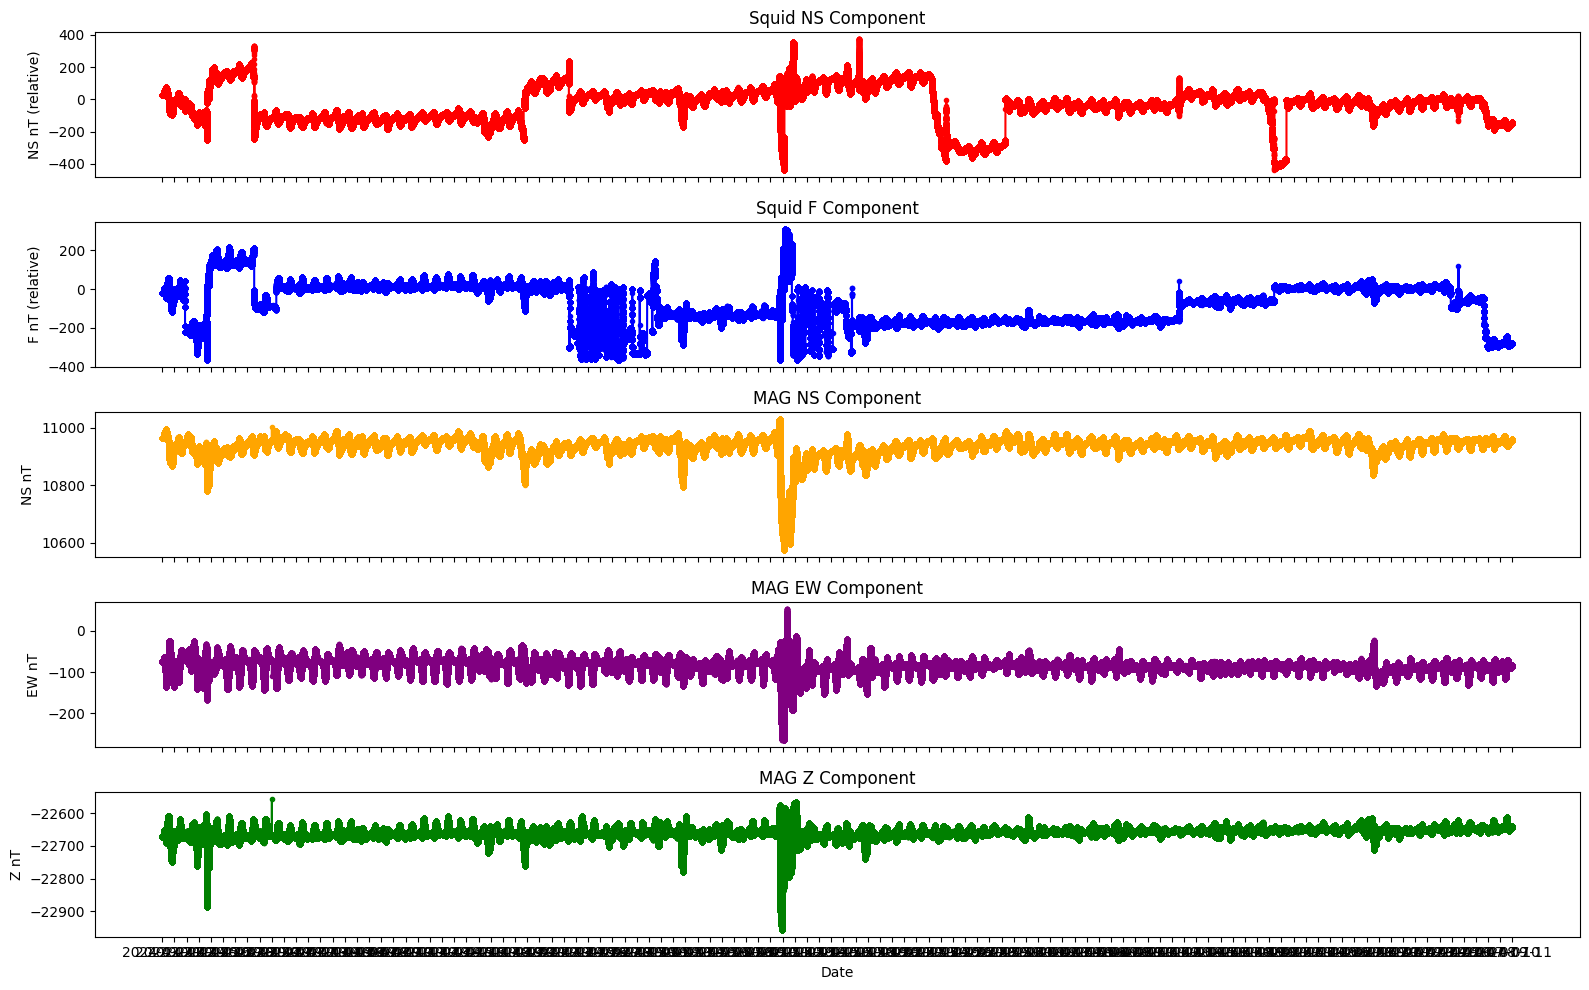

In [5]:
sample_count = len(time)
samples_per_day = int(sample_count / num_days)
print(f"Number of days between {start_date} and {end_date}: {num_days}")
print(f"Number of samples in {num_days} days is : {sample_count}")
print(f"Therefore number of samples per day: {samples_per_day}")

defplot.generateDataPlots(NSsq, Zsq, NSmag, EWmag, Zmag, sample_count, samples_per_day, start_date,end_date)
plt.tight_layout()
plt.show()